<a href="https://colab.research.google.com/github/ayucahyarani/Data-Mining/blob/main/Fix_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mengimplementasikan Konsep Segmentasi Pelanggan untuk menilai pelanggan mal berdasarkan perilaku dan data pembelian mereka.**

#**Import Library**

##**Core Library**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
from google.colab import files

##**Library untuk Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

##**Library untuk Normalisasi Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

##**Library Untuk Build Model**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Segmentasi pelanggan di mal bertujuan untuk memahami cara pelanggan berbelanja di mal. Tujuan utamanya adalah untuk memahami pelanggan lebih baik, meningkatkan pengalaman berbelanja, dan meningkatkan keuntungan.

##**Assess Situation**

Di mal, pelanggan memiliki kebiasaan berbelanja yang beragam. Dengan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian, kita bisa mengetahui lebih banyak tentang preferensi mereka dan bagaimana kita bisa melayani mereka lebih baik.

##**Data Mining Goals**

- Mengelompokkan pelanggan berdasarkan pola pembelian dan perilaku mereka.
- Mengidentifikasi kelompok pelanggan yang paling berharga untuk mal.
- Mempelajari faktor-faktor yang memengaruhi tingkat pengeluaran pelanggan.

##**Project Plan**

- Mengumpulkan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian.
- Menganalisis data untuk melihat pola dan tren dalam perilaku belanja pelanggan.
- Mengelompokkan pelanggan berdasarkan perilaku belanja mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Customer Segmentation" berasal dari Kaggle yang memberikan informasi tentang pelanggan di suatu mal. Dataset ini dikumpulkan oleh pengguna Kaggle dari mal tertentu untuk analisis segmentasi pelanggan.

Link dataset: https://www.kaggle.com/datasets/joebeachcapital/customer-segmentation

In [ ]:
cs = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/Data-Mining/main/Mall_Customers.csv')
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Describe Data**

###**Informasi Dasar**

In [ ]:
jumlah_baris, jumlah_kolom = cs.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 200
Jumlah kolom: 5


Dataset ini memiliki 200 baris dan 5 kolom. Artinya, terdapat 200 data pelanggan dalam dataset tersebut, yang dibagi ke dalam 5 kolom yang berbeda yang masing-masing menyimpan informasi seperti CustomerID, Gender, Age, Annual Income (k$), dan Spending Score (1-100).

###**Informasi Lanjutan**

In [ ]:
print(cs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Dataset ini memiliki 5 kolom dengan informasi sebagai berikut:

1. **CustomerID**: Kolom ini menyimpan ID unik untuk setiap pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

2. **Gender**: Kolom ini menyimpan informasi tentang jenis kelamin pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah objek (`object`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

3. **Age**: Kolom ini menyimpan informasi tentang usia pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

4. **Annual Income (k$)**: Kolom ini menyimpan informasi tentang pendapatan tahunan pelanggan dalam ribu dolar. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

5. **Spending Score (1-100)**: Kolom ini menyimpan informasi tentang skor pengeluaran pelanggan dalam skala 1-100. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

###**Informasi Statistik Deskriptif**

In [ ]:
print(cs.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Berikut adalah penjelasan statistik deskriptif untuk setiap kolom numerik dalam dataset:

**1. CustomerID:**

* **Mean:** Rata-rata ID pelanggan (100.500)
* **Std:** Standar deviasi ID pelanggan (57.879)
* **Min:** ID pelanggan terkecil (1)
* **25%:** 25% ID pelanggan terendah (50.750)
* **50%:** Median ID pelanggan (100.500)
* **75%:** 75% ID pelanggan terendah (150.250)
* **Max:** ID pelanggan terbesar (200.000)

**2. Age:**

* **Mean:** Rata-rata usia pelanggan (38.85 tahun)
* **Std:** Standar deviasi usia pelanggan (13.969 tahun)
* **Min:** Usia pelanggan termuda (18 tahun)
* **25%:** 25% pelanggan termuda (28.75 tahun)
* **50%:** Usia median pelanggan (36 tahun)
* **75%:** 75% pelanggan termuda (49 tahun)
* **Max:** Usia pelanggan tertua (70 tahun)

**3. Annual Income (k$)**:

* **Mean:** Rata-rata pendapatan tahunan pelanggan (60.560 dolar)
* **Std:** Standar deviasi pendapatan tahunan pelanggan (26.265 dolar)
* **Min:** Pendapatan tahunan terendah (15.000 dolar)
* **25%:** 25% pelanggan dengan pendapatan terendah (41.500 dolar)
* **50%:** Median pendapatan tahunan pelanggan (61.500 USD)
* **75%:** 75% pelanggan dengan pendapatan terendah (78.000 dolar)
* **Max:** Pendapatan tahunan tertinggi (137.000 dolar)

**4. Spending Score (1-100)**:

* **Mean:** Rata-rata skor pengeluaran pelanggan (50.20)
* **Std:** Standar deviasi skor pengeluaran pelanggan (25.824)
* **Min:** Skor pengeluaran terendah (1)
* **25%:** 25% pelanggan dengan skor pengeluaran terendah (34.75)
* **50%:** Median skor pengeluaran pelanggan (50)
* **75%:** 75% pelanggan dengan skor pengeluaran terendah (73)
* **Max:** Skor pengeluaran tertinggi (99)

##**Exploratory Data Analysis**

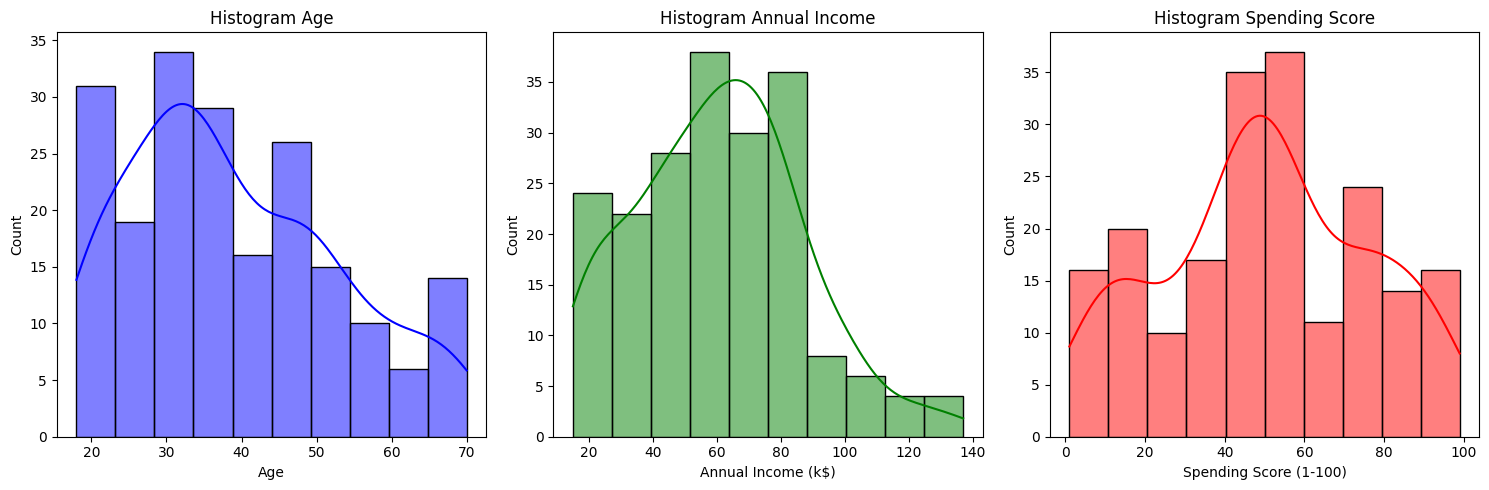

In [ ]:
#Distribution Plots

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(cs['Age'], bins=10, kde=True, color='blue')
plt.title('Histogram Age')

plt.subplot(1, 3, 2)
sns.histplot(cs['Annual Income (k$)'], bins=10, kde=True, color='green')
plt.title('Histogram Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(cs['Spending Score (1-100)'], bins=10, kde=True, color='red')
plt.title('Histogram Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat tiga Distribution Plots yang menunjukkan:

- **Age**: Distribusi usia berbentuk miring kanan dengan mayoritas orang berada di usia 20-an dan 30-an. Jumlah orang berkurang seiring dengan bertambahnya usia.
- **Annual Income (k$)**: Distribusi pendapatan tahunan rata-rata berbentuk miring kanan dengan mayoritas orang memiliki pendapatan di kisaran 50.000 - 100.000 dolar per tahun. Ada beberapa orang dengan pendapatan yang sangat tinggi (di atas 140.000 dolar per tahun).
- **Spending Score (1-100)**: Distribusi skor pengeluaran terdistribusi secara normal dengan mayoritas orang memiliki skor di kisaran 40-60.

<ipython-input-7-b54b5cf43600>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')


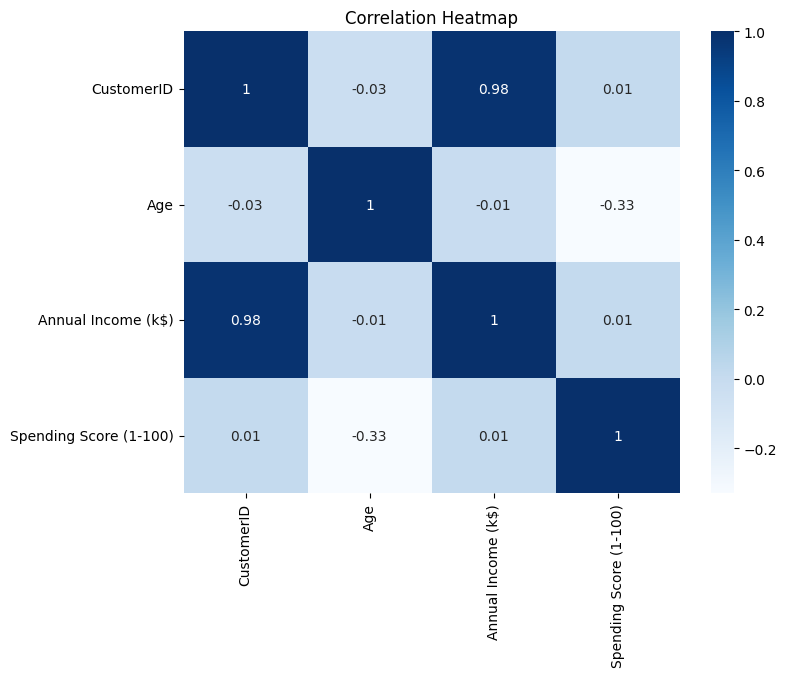

In [ ]:
#Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

plt.show()

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

- **CustomerID**: Tidak memiliki korelasi yang kuat dengan variabel lain.
- **Age**: Memiliki korelasi negatif yang lemah dengan Spending Score (1-100). Artinya, semakin tua seseorang, semakin kecil kemungkinan mereka untuk menghabiskan banyak uang.
- **Annual Income (k$)**: Memiliki korelasi positif yang kuat dengan Spending Score (1-100). Artinya, semakin tinggi pendapatan seseorang, semakin besar kemungkinan mereka untuk menghabiskan banyak uang.

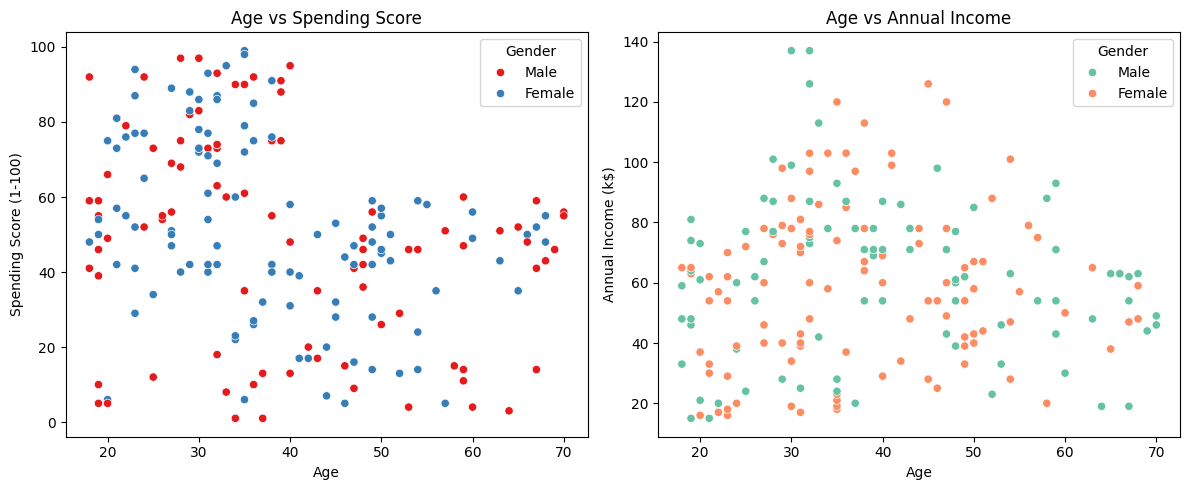

In [ ]:
#Scatterplot

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=cs, x='Age', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=cs, x='Age', y='Annual Income (k$)', hue='Gender', palette='Set2')
plt.title('Age vs Annual Income')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Scatterplot yang menunjukkan:

- **Age vs Spending Score**: Terdapat korelasi negatif yang lemah antara usia dan skor pengeluaran. Artinya, seiring bertambahnya usia, skor pengeluaran cenderung meningkat. Pola penyebaran data menunjukkan banyak variasi dalam skor pengeluaran untuk setiap kelompok usia.
- **Age vs Annual Income**: Terdapat korelasi positif yang kuat antara usia dan pendapatan tahunan rata-rata. Artinya, seiring bertambahnya usia, penghasilan tahunan cenderung meningkat secara signifikan. Pola penyebaran data menunjukkan variasi yang lebih kecil dalam penghasilan tahunan dibandingkan skor pengeluaran.

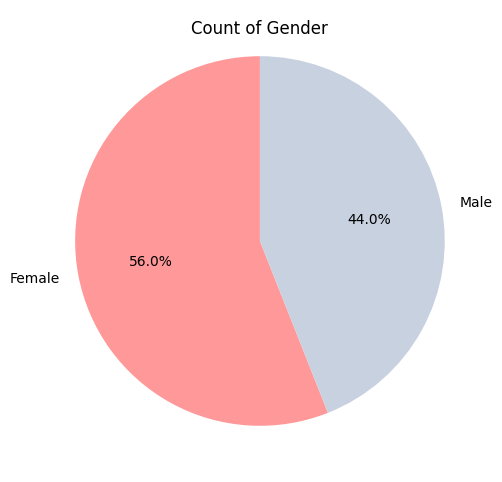

In [ ]:
#Pie Chart

gender_counts = cs['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#c7d1e0'])
plt.title('Count of Gender', y=0.93)
plt.show()

Berdasarkan gambar, terdapat Pie Chart yang menunjukkan jumlah pelanggan terbanyak berdasarkan gender adalah perempuan, yaitu sebanyak 56%.

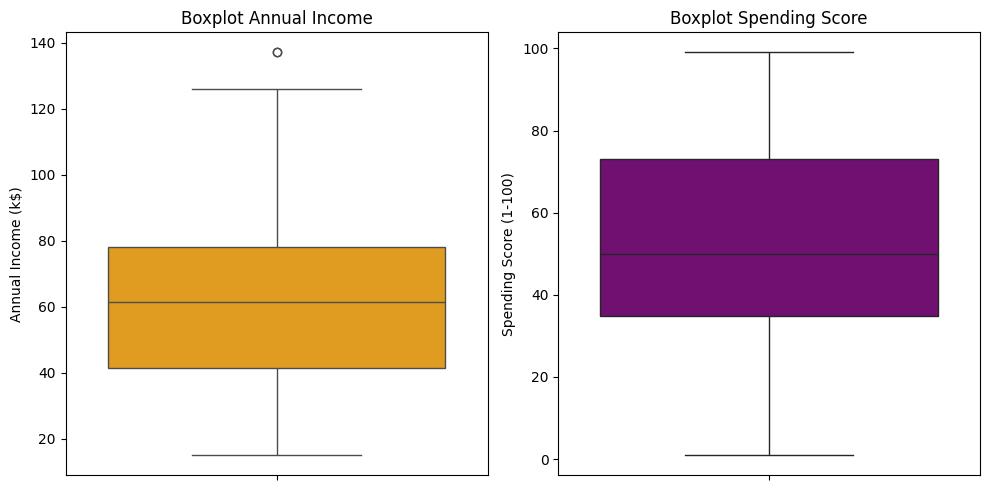

In [ ]:
#Boxplot

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Annual Income (k$)', data=cs, color='orange')
plt.title('Boxplot Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y='Spending Score (1-100)', data=cs, color='purple')
plt.title('Boxplot Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Boxplot yang menunjukkan:

- **Annual Income**: Median pendapatan tahunan adalah sekitar 80.000 dolar dan sebagian besar pendapatan tahunan berada antara 60.000 dan 100.000 dolar.
- **Spending Score**: Median skor pengeluaran adalah sekitar 60 dan sebagian besar skor pengeluaran berada antara 40 dan 80.

Secara umum, pelanggan dalam mal ini memiliki pendapatan tahunan yang lebih tinggi daripada skor pengeluaran mereka.

##**Verify Data Quality**

###**Missing Values**

In [ ]:
nama_kolom = cs.columns[cs.isnull().any()]
if nama_kolom.empty:
    print("Tidak ada nilai kosong pada dataset.")
else:
    print("Kolom dengan nilai kosong:", nama_kolom)

Tidak ada nilai kosong pada dataset.


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Outliers Values**

In [ ]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers pada dataset ini, terlihat bahwa hanya kolom "Annual Income (k$)" yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

###**Duplicated Values**

In [ ]:
result_data = []

for col in cs.columns:
    is_duplicated = 'Ya' if cs[col].duplicated().any() else 'Tidak'
    result_data.append({'Kolom': col, 'Duplikat': is_duplicated})

result_cs = pd.DataFrame(result_data)
print(result_cs)

                    Kolom Duplikat
0              CustomerID    Tidak
1                  Gender       Ya
2                     Age       Ya
3      Annual Income (k$)       Ya
4  Spending Score (1-100)       Ya


Berdasarkan kolom pada dataset ini, terlihat bahwa ada nilai duplikat pada kolom "Gender", "Age", "Annual Income (k$)", dan "Spending Score (1-100)". Yang berarti ada nilai yang sama muncul lebih dari sekali dalam setiap kolom yang disebutkan di atas. Sedangkan untuk kolom "CustomerID", tidak ada nilai yang sama yang muncul lebih dari sekali, yang berarti setiap ID pelanggan unik.

###**Inconsistent Values / Noise (Optional)**

In [ ]:
for column in cs.columns:
    print(f"Column: {column}")
    unique_values_count = len(cs[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: CustomerID
Jumlah Nilai Unik: 200

Column: Gender
Jumlah Nilai Unik: 2

Column: Age
Jumlah Nilai Unik: 51

Column: Annual Income (k$)
Jumlah Nilai Unik: 64

Column: Spending Score (1-100)
Jumlah Nilai Unik: 84



Berdasarkan analisis nilai inkonsisten / noise pada dataset ini menunjukkan:
- Kolom **CustomerID** memiliki nilai unik sebanyak 200, menunjukkan bahwa tidak ada duplikasi data.
- Kolom **Gender** memiliki nilai unik sebanyak 2, menunjukkan hanya ada dua jenis kelamin yang terdaftar (male dan female).
- Kolom **Age** memiliki nilai unik sebanyak 51, menunjukkan rentang usia yang cukup luas (dari 18 hingga 70 tahun) dengan 51 kemungkinan usia.
- Kolom **Annual Income (k$)** memiliki 64 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang pendapatan yang luas (dari 15.000 hingga 137.000 dolar) dengan 64 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.
- Kolom **Spending Score (1-100)** memiliki 84 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang skor yang luas (dari 1 hingga 99) dengan 84 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.

#**DATA PREPARATION**

##**Data Cleaning**

###**Pengecekkan Missing Values**

In [ ]:
print((cs.isna().sum() / len(cs)) * 100)

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

###**Pengecekkan Duplicated Values**

In [ ]:
cs[cs.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Dalam dataset ini setiap baris data memiliki kombinasi nilai yang unik untuk setiap kolomnya, jadi tidak ada baris data yang dianggap duplikat.

##**Pengecekkan Outliers**

In [ ]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers pada dataset ini, terlihat bahwa hanya kolom "Annual Income (k$)" yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

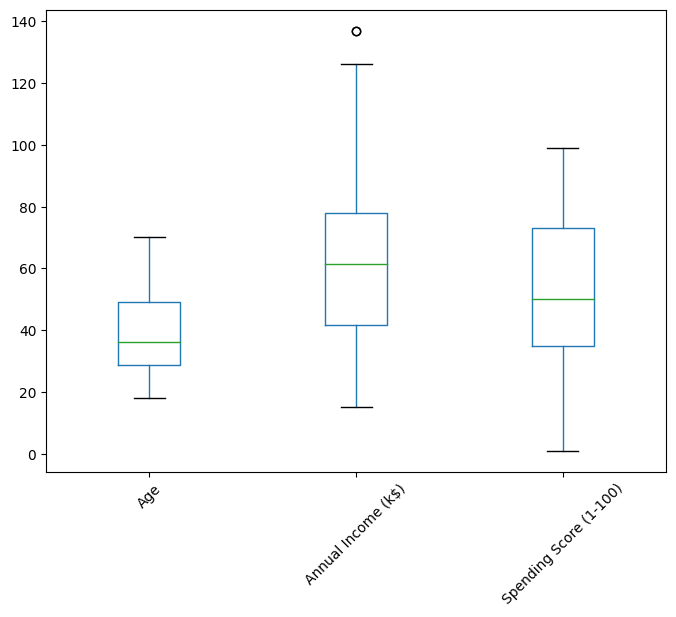

In [ ]:
boxplot = cs.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan gambar, terdapat boxplot yang menunjukkan:

Kolom "Annual Income (k$)" memiliki beberapa orang yang pendapatan tahunannya jauh lebih tinggi dibandingkan dengan orang lain pada umumnya. Outliers ini terletak di luar batas interkuartil (IQR), yang diwakili oleh garis kotak pada grafik.

####**Hapus Outliers**

Melakukan penghapusan baris pada kolom "Annual Income (k$)" untuk menanganani outliers

In [ ]:
Q1 = cs['Annual Income (k$)'].quantile(0.25)
Q3 = cs['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cs = cs[(cs['Annual Income (k$)'] >= lower_bound) & (cs['Annual Income (k$)'] <= upper_bound)]

####**Pengecekkan Ulang**

In [ ]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi outliers setelah dilakukan penghapusan outliers, dapat dilihat bahwa kolom "Annual Income (k$)" sudah tidak memiliki outliers. Artinya data ini dapat memberikan gambaran yang lebih akurat tentang pendapatan tahunan rata-rata di setiap kelompok usia.

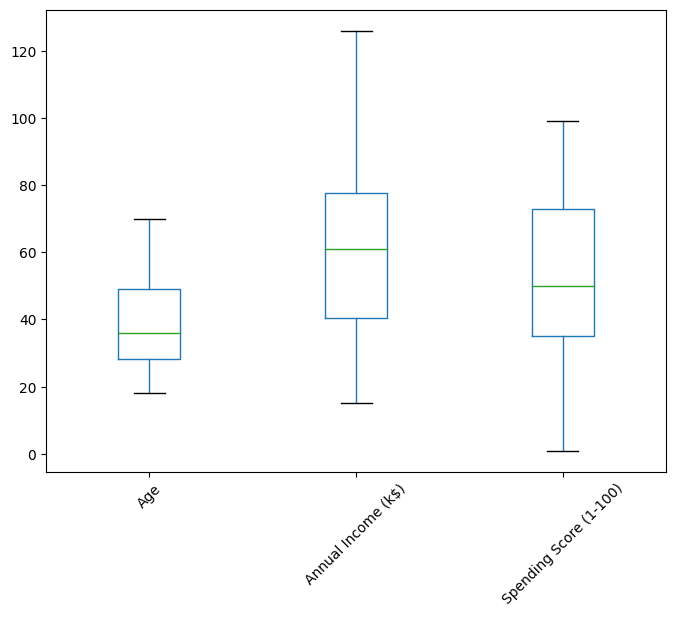

In [ ]:
boxplot = cs.drop('CustomerID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Berdasarkan gambar, terdapat boxplot yang menunjukkan penghapusan outlier menyebabkan perubahan pada distribusi pendapatan tahunan:

- **Kelompok usia 20-30 tahun**: Batas kotak atas dan bawah turun, menunjukkan pendapatan tahunan yang lebih terkonsentrasi.
- **Kelompok usia 40-50 tahun**: Batas kotak atas turun, menunjukkan pendapatan tahunan maksimum yang lebih rendah.
- **Kelompok usia 60-70 tahun**: Median income turun, menunjukkan pendapatan tahunan rata-rata yang lebih rendah.

##**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

 Menambahkan kolom "Income Category" yang bertujuan agar data lebih terstruktur dan mudah dipahami. Dengan kolom ini, pengguna bisa menganalisis data dengan lebih baik untuk melihat pola atau tren dalam pendapatan tahunan. Kategori ini juga membantu dalam segmentasi pelanggan berdasarkan pendapatannya, yang bisa membantu dalam membuat strategi pemasaran atau keputusan bisnis.

In [ ]:
def categorize_income(income):
    if 15 <= income <= 30:
        return 'Low'
    elif 31 <= income <= 60:
        return 'Medium'
    elif 61 <= income <= 100:
        return 'High'
    elif 101 <= income <= 137:
        return 'Very High'
    else:
        return 'Unknown'

cs['Income Category'] = cs['Annual Income (k$)'].apply(categorize_income)

###**Pengecekkan Hasil**

In [ ]:
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,Low
2,3,Female,20,16,6,Low
3,4,Female,23,16,77,Low
4,5,Female,31,17,40,Low


Berdasarkan dataset tersebut, dapat dilihat bahwa kolom "Income Category" sudah berhasil ditambahkan dalam dataset ini.

##**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
cs_corr = cs.corr(numeric_only=True)
px.imshow(cs_corr)

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

Kolom "CustomerID" tidak memiliki hubungan yang kuat dengan kolom lain. Hal ini terlihat dari warna kuning pada heatmap pada baris dan kolom CustomerID. Oleh karena itu, kolom CustomerID akan dihapus untuk meningkatkan efisiensi analisis.

In [ ]:
cs = cs.drop(['CustomerID'], axis=1)

Dalam dataset ini kolom "CustomerID" hanya berperan sebagai identifikasi unik untuk setiap entitas dalam dataset dan tidak memiliki hubungan yang kuat dengan kolom lain. Dengan demikian, menghapus kolom ini dapat mengurangi kompleksitas dataset, menghemat ruang penyimpanan, dan mempercepat proses analisis karena ukuran dataset menjadi lebih kecil.

###**Pengecekkan Hasil**

In [ ]:
cs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,Male,19,15,39,Low
1,Male,21,15,81,Low
2,Female,20,16,6,Low
3,Female,23,16,77,Low
4,Female,31,17,40,Low


Berdasarkan dataset tersebut, dapat dilihat bahwa kolom "CustomerID" sudah berhasil dihapus dari dataset ini.

##**Data Transformation**

###**Mapping**

Mapping dilakukan pada kolom:
- **Gender**: mengubah nilai kolom menjadi numerik, dengan 'Male' menjadi 1 dan 'Female' menjadi 0.
- **Income Category**: mengubah nilai kolom menjadi numerik, dengan 'Low' menjadi 0, 'Medium' menjadi 1, 'High' menjadi 2, dan 'Very High' menjadi 3

In [ ]:
cs['Gender'] = cs['Gender'].map({'Male':1,'Female':0})
cs['Income Category'] = cs['Income Category'].map({'Low': 0, 'Medium': 1,'High': 2, 'Very High': 3}).astype(int)

In [ ]:
cs

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,3
197,1,32,126,74,3
198,1,32,137,18,3


###**Encoding**

Mengonversi variabel kategori menjadi bentuk biner (dummy variables) dalam bentuk matriks 0 dan 1. Hal ini memungkinkan algoritma machine learning untuk memahami dan memproses variabel kategori, sehingga meningkatkan kemampuan model untuk melakukan prediksi dan analisis data.

In [ ]:
cs = pd.get_dummies(cs)

###**Pengecekkan Hasil**

In [ ]:
cs.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


Berdasarkan dataset tersebut, dapat dilihat bahwa setelah melakukan encoding tidak ada perubahan pada data, karena encoding secara otomatis mengenali kolom-kolom yang sudah dalam bentuk numerik dan tidak memerlukan encoding tambahan.

##**Konversi DataFrame**

Menyimpan data set yang telah dibersihkan ke file CSV baru.

In [ ]:
#files.download("Data_Cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**MODELLING TECHNIQUES**

Pada tahap evaluation, teknik pemodelan diubah menjadi **Asosiatif** karena model asosiatif dapat mengungkapkan hubungan yang lebih kompleks dan tersembunyi di antara variabel-variabel dalam dataset. Dibandingkan dengan model prediktif, model asosiatif memberikan wawasan yang lebih mendalam tentang bagaimana variabel-variabel ini saling berhubungan, yang dapat digunakan untuk membuat strategi segmentasi pelanggan yang lebih efektif.

##**Inisiasi Variabel untuk Menyimpan Dataframe pada Modelling**

In [ ]:
cs2 = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/Data-Mining/main/Data_Cleaned.csv')
cs2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Category
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0


##**Pre-Processing**

###**Adjusment**

In [ ]:
x_final = cs2.drop(["Gender", "Income Category"], axis=1)

Menghapus kolom "Gender" dan "Income Category" karena tidak relevan dalam proses analisis asosiatif. Hal ini dilakukan agar fokus analisis dapat ditingkatkan pada hubungan antara variabel yang lebih penting seperti Age, Annual Income, dan Spending Score.

In [ ]:
print(x_final)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


###**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Normalisasi data berfungsi untuk mengubah nilai-nilai pada kolom-kolom yang tersisa setelah penyesuaian ke dalam rentang skala yang seragam antara 0 dan 1. Hal ini membantu menghilangkan perbedaan skala antar fitur-fitur, sehingga memastikan bahwa semua fitur memiliki pengaruh yang seimbang dalam analisis dan segmentasi pelanggan.

###**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

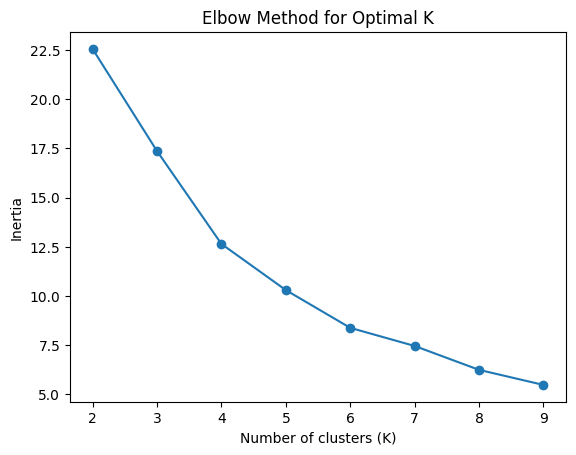

In [ ]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Berdasarkan grafik Elbow di atas, jumlah kluster optimal untuk model asosiatif adalah 4. Hal ini ditunjukkan oleh titik siku (elbow) pada kurva inersia, di mana terdapat perubahan kemiringan yang signifikan.

##**Build Model**

###**K-Means**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Code di atas bertujuan untuk membangun model menggunakan teknik K-Means Clustering dalam analisis data. Dengan menggunakan KMeans(n_clusters=4, random_state=42), model ini akan mengelompokkan data dari x_final_norm ke dalam empat klaster berbeda berdasarkan pola dan karakteristik yang dimiliki oleh setiap data.

###**Hierarchical Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

Code di atas bertujuan untuk membangun model menggunakan teknik Agglomerative Hierarchical Clustering untuk mengelompokkan data ke dalam empat klaster. Metode ini menggunakan jarak euclidean antara titik data dan metode linkage ward untuk menghitung perbedaan varian dan menggabungkan klaster.

##**Begins and Compare Clusters**

In [ ]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Code di atas digunakan untuk memprediksi klaster data yang telah dinormalisasi menggunakan model K-Means Clustering (kmeans.predict) dan Hierarchical Clustering (hc.fit_predict). Dengan prediksi klaster ini, kita bisa memahami bagaimana data dikelompokkan berdasarkan karakteristiknya.

In [ ]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

Code di atas digunakan untuk mengambil hasil prediksi klaster dari model K-Means dan Hierarchical Clustering yang telah dibangun sebelumnya, kemudian menggabungkannya dengan data asli dalam DataFrame baru bernama combined_data_assoc.

In [ ]:
combined_data_assoc.head()

,Age,Annual Income (k$),Spending Score (1-100),kmeans_cluster,hierarchy_cluster
0,19,15,39,0,0
1,21,15,81,0,0
2,20,16,6,0,0
3,23,16,77,0,0
4,31,17,40,0,0


##**Visualisasi**

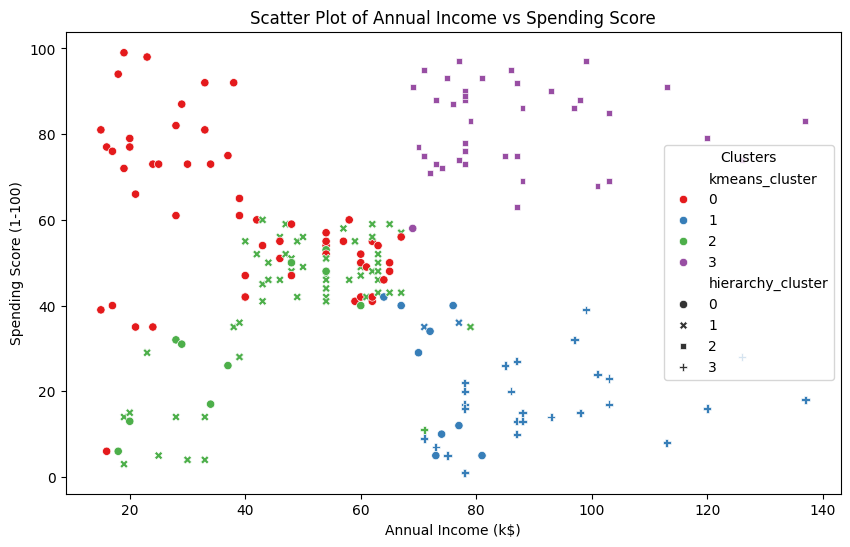

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data_assoc, x='Annual Income (k$)', y='Spending Score (1-100)', hue='kmeans_cluster', style='hierarchy_cluster', palette='Set1')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters')
plt.show()

Visualisasi di atas menampilkan scatter plot yang membandingkan Annual Income (k$)',dan Spending Score (1-100). Data dikelompokkan menggunakan teknik K-Means dan Hierarchical Clustering. Terdapat empat klaster yang diidentifikasi:

- Cluster Merah: Menunjukkan individu dengan pendapatan rendah tetapi skor pengeluaran tinggi.
- Cluster Hijau: Mewakili kelompok pendapatan dan pengeluaran menengah.
- Cluster Biru: Individu dengan pendapatan tinggi tetapi skor pengeluaran rendah.
- Cluster Ungu: Menandakan individu dengan pendapatan dan skor pengeluaran sangat tinggi.

#**EVALUATION**

##**Evaluate Results**

###**Klustering**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

cs2_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

cs2_scores = cs2_scores.set_index('')

cs2_scores = cs2_scores.T

display(cs2_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.392319,127.829349,0.970649
Agglomerative Clustering Score,0.365233,113.839438,0.929388


Dari evaluasi hasil klastering yang dilakukan menggunakan metrik Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score, dapat disimpulkan bahwa:

1. **Silhouette Score:**
   - KMeans Score: 0.392319
   - Agglomerative Clustering Score: 0.365233

Silhouette Score mengukur seberapa baik objek-data dikelompokkan berdasarkan jarak antara kluster. Semakin mendekati 1, semakin baik pemisahan kluster. Hasil menunjukkan bahwa KMeans sedikit lebih baik dalam hal ini dibandingkan dengan Agglomerative Clustering.

2. **Calinski-Harabasz Score:**
   - KMeans Score: 127.829349
   - Agglomerative Clustering Score: 113.839438

Calinski-Harabasz Score mengevaluasi kekompakan dan pemisahan antara kluster. Semakin tinggi skornya, semakin baik klasteringnya. Berdasarkan skor ini, KMeans juga menunjukkan performa yang lebih baik daripada Agglomerative Clustering.

3. **Davies-Bouldin Score:**
   - KMeans Score: 0.970649
   - Agglomerative Clustering Score: 0.929388

Davies-Bouldin Score mengukur keberhasilan klastering berdasarkan jarak antara kluster dan seberapa seragam ukuran kluster. Semakin rendah skornya, semakin baik hasil klasteringnya. Dalam hal ini, Agglomerative Clustering memperoleh skor yang sedikit lebih baik daripada KMeans, menunjukkan bahwa Agglomerative Clustering dapat memberikan klastering yang lebih homogen.

Secara keseluruhan, dari ketiga metrik evaluasi tersebut, dapat disimpulkan bahwa KMeans cenderung memberikan hasil klastering yang sedikit lebih baik daripada Agglomerative Clustering untuk dataset dan pengaturan kluster yang digunakan. Meskipun perbedaan dalam beberapa metrik tidak terlalu besar, namun KMeans secara konsisten menunjukkan performa yang lebih baik dalam hal pemisahan kluster dan kekompakan, sementara Agglomerative Clustering sedikit lebih baik dalam hal homogenitas kluster.

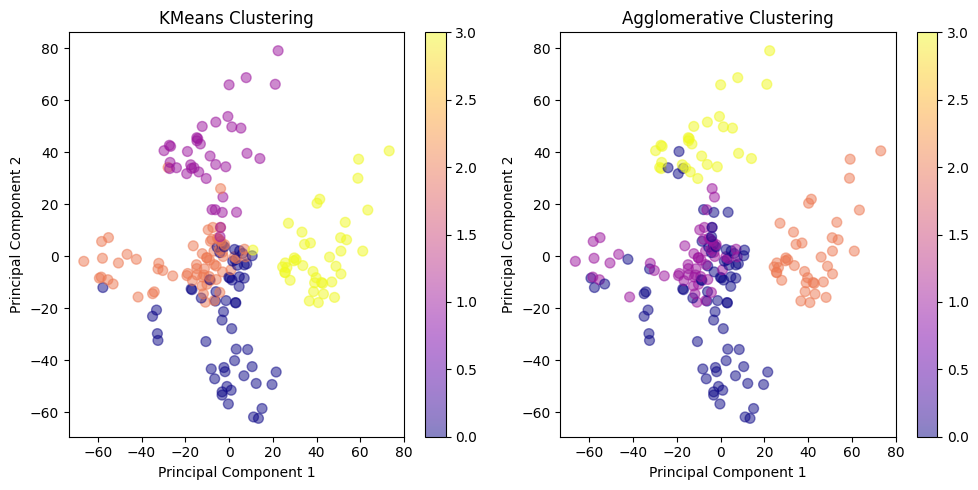

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(cs2)

# Visualisasi klaster untuk KMeans
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='plasma', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

# Visualisasi klaster untuk Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=hierarchy_clust, cmap='plasma', s=50, alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas, terlihat bagaimana data terbagi menjadi beberapa kelompok (klaster) berdasarkan hasil klastering menggunakan algoritma K-Means dan Agglomerative Hierarchical Clustering.

Visualisasi di atas menunjukkan bahwa kedua algoritma klastering menghasilkan pengelompokan data yang berbeda. K-Means menghasilkan klaster yang lebih kecil dan tersebar, sedangkan Agglomerative Hierarchical klastering menghasilkan klaster yang lebih besar dan terhubung.


##**Review Process**

###**Cross Validation**

In [ ]:
import warnings
from sklearn.metrics import silhouette_score

# Definisikan metrik evaluasi
def evaluate_clustering(model,cs2):
    labels = model.fit_predict(cs2)
    return silhouette_score(cs2, labels)

# Definisikan algoritma yang akan digunakan
algorithms = {
    'KMeans': KMeans(n_clusters=4),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=4)
}

warnings.simplefilter(action='ignore', category=FutureWarning)

# Melakukan cross-validation menggunakan cross_val_score
for algorithm_name, algorithm in algorithms.items():
    print(f"Evaluasi untuk algoritma: {algorithm_name}")
    scores = cross_val_score(algorithm, cs2, cv=5, scoring=evaluate_clustering)
    print(f"Skor Silhouette: {scores}")
    print(f"Skor rata-rata Silhouette: {np.mean(scores)}")
    print()

Evaluasi untuk algoritma: KMeans
Skor Silhouette: [0.51502272 0.39092952 0.46235445 0.44011435 0.4086238 ]
Skor rata-rata Silhouette: 0.4434089673671259

Evaluasi untuk algoritma: Agglomerative Clustering
Skor Silhouette: [0.53020714 0.39451519 0.37021057 0.44011435 0.44803181]
Skor rata-rata Silhouette: 0.43661581306631625



Dari hasil cross-validation yang dilakukan menggunakan metrik evaluasi Silhouette Score untuk algoritma KMeans dan Agglomerative Clustering dengan 5-fold cross-validation, dapat disimpulkan bahwa:

1. **KMeans:**
   - Skor Silhouette: [0.51502272, 0.39092952, 0.46235445, 0.44011435, 0.4086238]
   - Skor rata-rata Silhouette: 0.4434089673671259

2. **Agglomerative Clustering:**
   - Skor Silhouette: [0.53020714, 0.39451519, 0.37021057, 0.44011435, 0.44803181]
   - Skor rata-rata Silhouette: 0.43661581306631625

Dari skor rata-rata Silhouette Score, dapat dilihat bahwa KMeans memiliki skor rata-rata yang lebih tinggi daripada Agglomerative Clustering. Ini menunjukkan bahwa secara umum, KMeans memberikan klastering yang lebih baik dalam hal jarak antara klaster dan pemisahan antara kluster, berdasarkan metrik Silhouette Score.

###**Feature Selection**

####**K-Means**

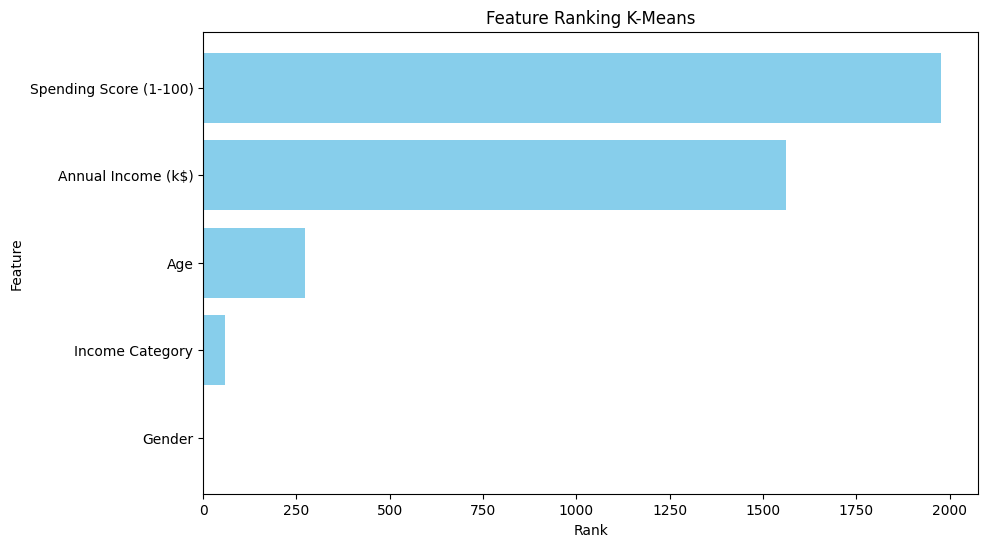

In [ ]:
# Inisialisasi model clustering (misalnya KMeans)
kmeans = KMeans(n_clusters=4)
kmeans.fit(cs2)

# Inisialisasi selector fitur
selector = SelectKBest(score_func=chi2, k='all')

# Menggunakan metode fit_transform pada selector
x_selected = selector.fit_transform(cs2, kmeans.labels_)

# Mengambil skor fitur
feature_ranks = selector.scores_

# Mengambil nama fitur
feature_names = cs2.columns

# Membuat DataFrame untuk menyimpan skor fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking K-Means')
plt.gca().invert_yaxis()
plt.show()


Dari tahap Feature Selection yang dilakukan dengan menggunakan algoritma KMeans, dapat disimpulkan bahwa fitur-fitur yang memiliki pengaruh signifikan terhadap hasil klastering yang dihasilkan adalah:

1. **Spending Score (1-100):**
   Fitur ini memiliki pengaruh yang signifikan terhadap hasil klastering, menunjukkan bahwa pola pengeluaran pelanggan dapat menjadi faktor penting dalam pembentukan klaster.

2. **Annual Income (k$):**
   Tingkat pendapatan tahunan juga memiliki pengaruh yang kuat terhadap klaster yang terbentuk, menunjukkan bahwa karakteristik finansial pelanggan memainkan peran penting dalam pembagian klaster.

3. **Age:**
   Variabel usia pelanggan juga memiliki pengaruh yang signifikan terhadap klaster yang terbentuk, menunjukkan bahwa aspek demografis dapat memengaruhi pola klastering.

4. **Income Category:**
   Kategori pendapatan juga termasuk dalam fitur yang penting, menunjukkan bahwa segmentasi berdasarkan kategori pendapatan dapat memberikan wawasan yang berharga dalam pemahaman klaster.

5. **Gender:**
   Fitur jenis kelamin juga dapat berperan dalam pembentukan klaster, meskipun mungkin memiliki pengaruh yang lebih rendah dibandingkan dengan variabel lainnya.

####**Hierarchical Clustering**

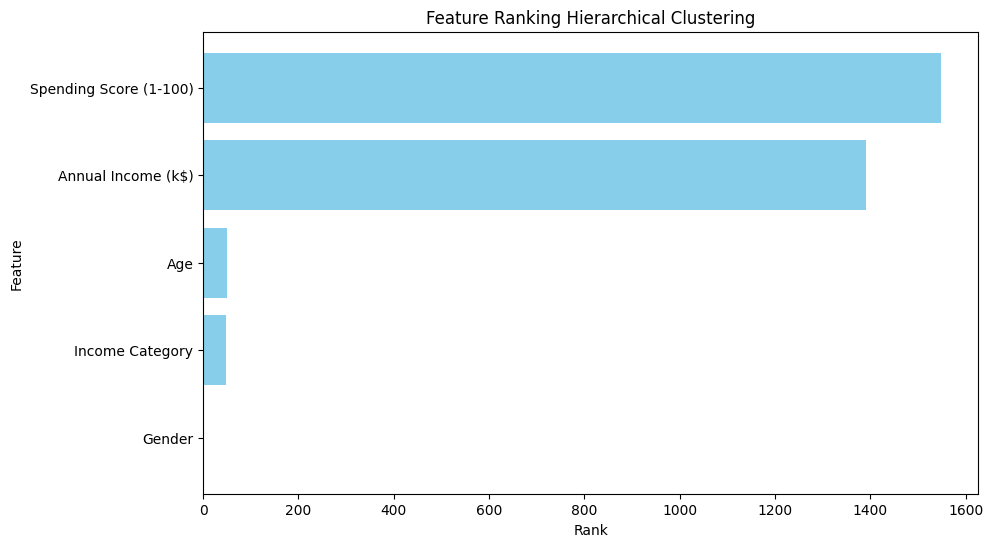

In [ ]:
# Inisialisasi model clustering hirarkis (Agglomerative Clustering)
hierarchy_clust = AgglomerativeClustering(n_clusters=3)

# Melakukan clustering pada data
hierarchy_clust.fit(cs2)

# Inisialisasi selector fitur
selector = SelectKBest(score_func=chi2, k='all')

# Menggunakan metode fit_transform pada selector
x_selected = selector.fit_transform(cs2, hierarchy_clust.labels_)

# Mengambil skor fitur
feature_ranks = selector.scores_

# Mengambil nama fitur
feature_names = cs2.columns

# Membuat DataFrame untuk menyimpan skor fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking Hierarchical Clustering')
plt.gca().invert_yaxis()
plt.show()

Dari tahap Feature Selection yang dilakukan menggunakan algoritma Agglomerative Clustering, dapat disimpulkan bahwa fitur-fitur yang memiliki pengaruh signifikan terhadap hasil klastering yang dihasilkan adalah:

1. **Spending Score (1-100):**
   Fitur ini memiliki pengaruh yang signifikan terhadap hasil klastering, menunjukkan bahwa pola pengeluaran pelanggan dapat menjadi faktor penting dalam pembentukan klaster.

2. **Annual Income (k$):**
   Tingkat pendapatan tahunan juga memiliki pengaruh yang kuat terhadap klaster yang terbentuk, menunjukkan bahwa karakteristik finansial pelanggan memainkan peran penting dalam pembagian klaster.

3. **Age:**
   Variabel usia pelanggan juga memiliki pengaruh yang signifikan terhadap klaster yang terbentuk, menunjukkan bahwa aspek demografis dapat memengaruhi pola klastering.

4. **Income Category:**
   Kategori pendapatan juga termasuk dalam fitur yang penting, menunjukkan bahwa segmentasi berdasarkan kategori pendapatan dapat memberikan wawasan yang berharga dalam pemahaman klaster.

5. **Gender:**
   Fitur jenis kelamin juga dapat berperan dalam pembentukan kluster, meskipun mungkin memiliki pengaruh yang lebih rendah dibandingkan dengan variabel lainnya.

##**Tuning Hyperparameter**

###**K-Means**

In [ ]:
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

# Evaluasi kualitas klastering menggunakan Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(cs2)
            silhouette_avg = silhouette_score(cs2, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

# Menampilkan parameter dengan Silhouette Score terbaik
print("\nParameter terbaik :")
print(best_params)
print("Silhouette Score :", best_score)


Parameter terbaik :
{'n_clusters': 6, 'init': 'random', 'algorithm': 'lloyd'}
Silhouette Score : 0.4512399514873468


Dari proses tuning hyperparameter K-Means yang dilakukan dengan mencari parameter terbaik berdasarkan evaluasi menggunakan Silhouette Score, dapat disimpulkan bahwa:

- **Jumlah Kluster (n_clusters):** Parameter terbaik yang ditemukan adalah 6 kluster.
- **Metode Inisialisasi (init):** Metode inisialisasi terbaik adalah 'random', yang berarti pusat kluster diinisialisasi secara acak.
- **Algoritma Klastering (algorithm):** Algoritma terbaik yang digunakan adalah 'lloyd', yang merujuk pada metode Lloyd's atau juga dikenal sebagai metode k-means standar.

Dengan konfigurasi hyperparameter terbaik ini, model K-Means memberikan Silhouette Score sebesar 0.4512399514873468, yang menunjukkan tingkat kualitas klastering yang baik.

###**Hierarchical Clustering**

In [ ]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(cs2)
    silhouette_avg = silhouette_score(cs2, labels)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(cs2)
silhouette_avg = silhouette_score(cs2, labels)

print("\nParameter terbaik :")
print(best_params)
print("Silhouette Score :", best_score)


Parameter terbaik :
{'metric': 'euclidean', 'linkage': 'complete'}
Silhouette Score : 0.3812699130228275


Dari proses tuning hyperparameter Hierarchical Clustering yang dilakukan dengan mencari parameter terbaik berdasarkan evaluasi menggunakan Silhouette Score, dapat disimpulkan bahwa:

- **Metrik Jarak (metric):** Parameter terbaik yang ditemukan adalah menggunakan metrik Euclidean.
- **Metode Penggabungan (linkage):** Metode penggabungan terbaik adalah 'complete', yang menggabungkan kluster berdasarkan jarak terjauh antara dua titik yang paling dekat di antara kluster yang berbeda.

Dengan konfigurasi hyperparameter terbaik ini, model Hierarchical Clustering memberikan Silhouette Score sebesar 0.3812699130228275, yang menunjukkan tingkat kualitas klastering yang cukup baik.


##**Determine Next Steps**

Dari analisis yang dilakukan menggunakan model Asosiatif sebelumnya dengan dua metode klastering, yaitu KMeans dan Agglomerative Clustering, dapat disimpulkan bahwa **KMeans** cenderung memberikan hasil yang lebih baik dibandingkan dengan Agglomerative Clustering dalam konteks dataset dan pengaturan kluster yang digunakan. Hal ini terlihat dari evaluasi menggunakan metrik seperti Silhouette Score, Calinski-Harabasz Score, dan Davies-Bouldin Score, di mana KMeans secara konsisten memperoleh skor yang lebih tinggi dan menunjukkan klastering yang lebih baik.

Fitur-fitur penting yang diidentifikasi dalam kedua metode klastering juga sejalan, dengan fitur-fitur seperti Spending Score, Annual Income, Age, Income Category, dan Gender memiliki pengaruh yang signifikan terhadap pembentukan kluster. Oleh karena itu, untuk tujuan segmentasi atau analisis klastering pada dataset ini, model KMeans dapat digunakan dengan hyperparameter yang telah dioptimalkan sebelumnya untuk mendapatkan hasil yang optimal dan lebih mudah dipahami.